In [1]:
import requests
import json
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot
from IPython.display import SVG   # jupyter 상에서 SVG 이미지를 표시하기 위한 패키지
from bs4 import BeautifulSoup

In [2]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
session = requests.Session()
session.headers.update( {'User-agent': user_agent, 'referer': None} )

In [3]:
api_url = "http://itpaper.co.kr/demo/covid19/all.php"

In [4]:
r = session.get(api_url)

if r.status_code != 200:
    print("[%d Error] %s" % (r.status_code, r.reason))
    quit()

r.encoding = "utf-8"
covid19_dict = json.loads(r.text)

# 출력 결과가 매우 길기 때문에 내용 확인 후 주석처리
#covid19_dict

In [5]:
지역명 = list(covid19_dict['data'].keys())
지역명

['서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [6]:
데이터누적 = DataFrame()

for v in 지역명:
    # 하나의 지역을 임시 데이터 프레임으로 변환
    tmp_df = DataFrame(covid19_dict['data'][v])
    
    # 임시 데이터 프레임에 지역명 컬럼 추가
    tmp_df['지역'] = v
    
    # 임시 데이터 프레임을 누적해서 병합
    데이터누적 = 데이터누적.append(tmp_df)

# 컬럼이름 변경을 위한 딕셔너리 정의
column_name = {'date': '날짜', 'active': '치료중', 'confirmed_acc': '누적확진자', 'death_acc': '누적사망자', 'released_acc': '누적격리해제', 'confirmed': '확진자', 'death': '사망자', 'released': '격리해제'}

데이터누적.rename(columns=column_name, inplace=True)

# 데이터 병합과정에서 중복되는 index가 발생하므로 index번호를 리셋한다.
# -> drop=True는 기존의 인덱스는 삭제하는 옵션
데이터누적.reset_index(drop=True, inplace=True)

데이터누적

,날짜,치료중,누적확진자,누적사망자,누적격리해제,확진자,사망자,격리해제,지역
0,2.17,11,14,0,3,14,0,3,서울
1,2.18,11,14,0,3,0,0,0,서울
2,2.19,10,15,0,5,1,0,2,서울
3,2.20,17,22,0,5,7,0,0,서울
4,2.21,21,27,0,6,5,0,1,서울
5,2.22,24,30,0,6,3,0,0,서울
6,2.23,25,31,0,6,1,0,0,서울
7,2.24,27,35,0,8,4,0,2,서울
8,2.25,33,41,0,8,6,0,0,서울
9,2.26,41,49,0,8,8,0,0,서울


In [7]:
import pandas as pd
데이터누적.to_csv("누적data.csv", encoding='euc-kr',mode='w')

In [8]:
covid19_df = 데이터누적.copy()

for i in list(covid19_df.index):
    날짜 = covid19_df.loc[i, '날짜']
    p = 날짜.find(".")
    월 = int(날짜[:p])
    일 = int(날짜[p+1:])
    변환날짜 = "%04d/%02d/%02d" % (2020, 월, 일)
    #print(변환날짜)
    
    # 변환 결과를 다시 Dataframe에 넣는다.
    covid19_df.loc[i, '날짜'] = 변환날짜
    
# 데이터프레임의 날짜 컬럼을 datetime 형식으로 일괄 변환
# -> infer_datetime_format=True 는 파이썬이 문자열의 날짜형식을 지능적으로 판단하여 format을 추측
covid19_df['날짜'] = pd.to_datetime(covid19_df['날짜'], infer_datetime_format=True)
covid19_df['날짜']

0      2020-02-17
1      2020-02-18
2      2020-02-19
3      2020-02-20
4      2020-02-21
5      2020-02-22
6      2020-02-23
7      2020-02-24
8      2020-02-25
9      2020-02-26
10     2020-02-27
11     2020-02-28
12     2020-02-29
13     2020-03-01
14     2020-03-02
15     2020-03-03
16     2020-03-04
17     2020-03-05
18     2020-03-06
19     2020-03-07
20     2020-03-08
21     2020-03-09
22     2020-03-10
23     2020-03-11
24     2020-03-12
25     2020-03-13
26     2020-03-14
27     2020-03-15
28     2020-03-16
29     2020-03-17
          ...    
5223   2020-11-22
5224   2020-11-23
5225   2020-11-24
5226   2020-11-25
5227   2020-11-26
5228   2020-11-27
5229   2020-11-28
5230   2020-11-29
5231   2020-11-30
5232   2020-12-01
5233   2020-12-02
5234   2020-12-03
5235   2020-12-04
5236   2020-12-05
5237   2020-12-06
5238   2020-12-07
5239   2020-12-08
5240   2020-12-09
5241   2020-12-10
5242   2020-12-11
5243   2020-12-12
5244   2020-12-13
5245   2020-12-14
5246   2020-12-15
5247   202

In [9]:
last_date = covid19_df['날짜'].max()
last_date

Timestamp('2020-12-21 00:00:00')

In [10]:
last_df = covid19_df[(covid19_df['날짜'] == last_date)]
last_df #마지막 날짜에 해당하는 데이터만 추출

,날짜,치료중,누적확진자,누적사망자,누적격리해제,확진자,사망자,격리해제,지역
308,2020-12-21,6361,14711,130,8220,0,0,0,서울
617,2020-12-21,484,1493,27,982,0,0,0,부산
926,2020-12-21,222,7497,200,7075,0,0,0,대구
1235,2020-12-21,660,2248,15,1573,0,0,0,인천
1544,2020-12-21,116,866,3,747,0,0,0,광주
1853,2020-12-21,131,696,6,559,0,0,0,대전
2162,2020-12-21,261,545,14,270,0,0,0,울산
2471,2020-12-21,8,129,0,121,0,0,0,세종
2780,2020-12-21,3456,11702,164,8082,0,0,0,경기
3089,2020-12-21,254,951,13,684,0,0,0,강원


In [11]:
전국합계 = last_df.filter(['치료중','누적확진자','누적사망자','누적격리해제','확진자','사망자','격리해제']).sum()
전국합계

치료중       13594
누적확진자     47332
누적사망자       673
누적격리해제    33065
확진자           0
사망자           0
격리해제          0
dtype: int64

In [12]:
전국합계df = DataFrame(전국합계, columns=[last_date.strftime('%m/%d')])
전국합계df

,12/21
치료중,13594
누적확진자,47332
누적사망자,673
누적격리해제,33065
확진자,0
사망자,0
격리해제,0


In [13]:
지역별df = covid19_df.filter(['지역','날짜','치료중','누적확진자','누적사망자','누적격리해제','확진자','사망자','격리해제']).groupby('지역').sum()
지역별df #지역별로 전국 합산 산출

,치료중,누적확진자,누적사망자,누적격리해제,확진자,사망자,격리해제
지역,,,,,,,
강원,13106,54246,933,40207,951,13,684
경기,160053,838892,13683,665156,11702,164,8082
경남,13903,71335,40,57392,1062,2,734
경북,45664,429365,15045,368656,1987,60,1711
광주,12351,79351,414,66586,866,3,747
대구,196852,2043037,51363,1794822,7497,200,7075
대전,10280,64671,726,53665,696,6,559
부산,19696,98803,1604,77503,1493,27,982
서울,236414,971608,9117,726077,14711,130,8220


In [16]:
날짜별df = covid19_df.filter(['날짜','치료중','누적확진자','누적사망자','누적격리해제','확진자','사망자','격리해제']).groupby('날짜').sum()
날짜별df #날짜별로 전국 합산 산출

,치료중,누적확진자,누적사망자,누적격리해제,확진자,사망자,격리해제
날짜,,,,,,,
2020-02-17,20,30,0,10,30,0,10
2020-02-18,19,31,0,12,1,0,2
2020-02-19,35,51,0,16,20,0,4
2020-02-20,91,108,1,16,57,1,0
2020-02-21,187,205,1,17,97,0,1
2020-02-22,413,433,2,18,228,1,1
2020-02-23,579,602,5,18,169,3,0
2020-02-24,804,833,7,22,231,2,4
2020-02-25,945,977,10,22,144,3,0


In [17]:
delta = dt.timedelta(days=-7)
day7 = dt.datetime.now() + delta
day7

datetime.datetime(2020, 12, 11, 21, 12, 11, 506424)

In [18]:
일주일검색df = 날짜별df[(날짜별df.index >= day7)]
일주일검색df #일주일 전 날짜 이후의 데이터 조회

,치료중,누적확진자,누적사망자,누적격리해제,확진자,사망자,격리해제
날짜,,,,,,,
2020-12-12,9055,39474,577,29842,938,6,335
2020-12-13,9750,40490,579,30161,1016,2,319
2020-12-14,10157,41191,586,30448,701,7,287
2020-12-15,10559,42063,599,30905,872,13,457
2020-12-16,11231,43135,611,31293,1072,12,388
2020-12-17,11553,44142,633,31956,1007,22,663
2020-12-18,12226,45195,644,32325,1053,11,369


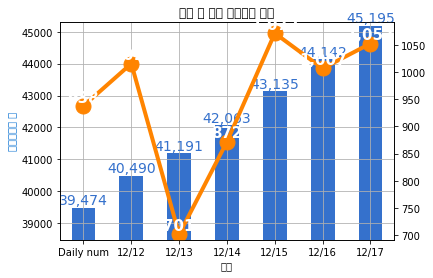

In [19]:
#일일 및 누적 확진환자 추세

fig = pyplot.figure()           # 영역을 나눌 수 있는 객체 생성
ax1 = fig.add_subplot(1,1,1)    # 1칸으로 구성된 서브 플롯 추가
ax2 = ax1.twinx()               # 두 번째 서브 플롯은 ax1을 복제

pyplot.title("일일 및 누적 확진환자 추세") 

#---------------------------------------------------
# 누적 확진 (막대 그래프)
#---------------------------------------------------
일주일검색df['누적확진자'].plot.bar(ax=ax1, color='#3571cc', rot=0)

ax1.set_xlabel('날짜')
ax1.set_ylabel('누적확진자 수', color='#1779d4')
ax1.grid() 
ax1.set_ylim([일주일검색df['누적확진자'].min()-1000, 일주일검색df['누적확진자'].max()+100])

# 그래프 위에 텍스트 표시
for i, v in enumerate(일주일검색df['누적확진자']):
    # 세자리마다 콤마를 표시하는 형식 지정
    msg = '{n:,}'.format(n=v)
    ax1.text(i, v+10, msg, fontsize = 14, color = "#3571cc", 
             horizontalalignment="center", verticalalignment="bottom") 

# x축 표시 라벨 설정
ax1.set_xticks(list(range(0, len(일주일검색df))))

# x축 라벨에 표시할 텍스트
x_labels = ['Daily num']
y_labels = ['number']

for date in 일주일검색df.index:
    x_labels.append(date.strftime("%m/%d"))

ax1.set_xticklabels(x_labels,fontsize=10, color='#000000')

#---------------------------------------------------
# 일별 확진 (시계열 그래프 )
#---------------------------------------------------
x = list(range(0, len(일주일검색df)))
y = 일주일검색df['확진자']
ax2.plot(x, y, color='#FF8400', marker="o", linewidth=4, markersize=15)
ax2.set_ylim(일주일검색df['확진자'].min()-10, 일주일검색df['확진자'].max()+20) 

# 시계열 그래프 위에 텍스트 표시
for i, v in enumerate(일주일검색df['확진자']):
    # 세자리마다 콤마를 표시하는 형식 지정
    msg = '{n:,}'.format(n=v)
    ax2.text(i, v+2, msg, fontsize = 15, color = "#FFFFFF", 
             horizontalalignment="center", verticalalignment="bottom", fontweight='bold')
    
pyplot.show()

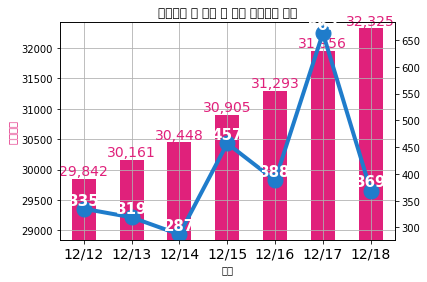

In [20]:
#일일 및 누적 격리해제 추세

fig = pyplot.figure()           # 영역을 나눌 수 있는 객체 생성
ax1 = fig.add_subplot(1,1,1)    # 1칸으로 구성된 서브 플롯 추가
ax2 = ax1.twinx()               # 두 번째 서브 플롯은 ax1을 복제

pyplot.title("확진환자 내 일일 및 누적 격리해제 추세") 

#---------------------------------------------------
# 누적 격리해제 (막대 그래프)
#---------------------------------------------------
일주일검색df['누적격리해제'].plot.bar(ax=ax1, color='#E0217B', rot=0)

ax1.set_xlabel('날짜')
ax1.set_ylabel('격리해제', color='#E0217B')
ax1.grid() 
ax1.set_ylim([일주일검색df['누적격리해제'].min()-1000, 일주일검색df['누적격리해제'].max()+100])

# 그래프 위에 텍스트 표시
for i, v in enumerate(일주일검색df['누적격리해제']):
    # 세자리마다 콤마를 표시하는 형식 지정
    msg = '{n:,}'.format(n=v)
    ax1.text(i, v+10, msg, fontsize = 14, color = "#E0217B", 
             horizontalalignment="center", verticalalignment="bottom") 

# x축 표시 라벨 설정
ax1.set_xticks(list(range(0, len(일주일검색df))))

# x축 라벨에 표시할 텍스트
x_labels = []

for date in 일주일검색df.index:
    x_labels.append(date.strftime("%m/%d"))

ax1.set_xticklabels(x_labels, fontsize=14, color='#000000')

#---------------------------------------------------
# 일별 격리해제 (시계열 그래프 )
#---------------------------------------------------
x = list(range(0, len(일주일검색df)))
y = 일주일검색df['격리해제']
ax2.plot(x, y, color='#1F7CCB', marker="o", linewidth=4, markersize=15)
ax2.set_ylim(일주일검색df['격리해제'].min()-10, 일주일검색df['격리해제'].max()+20) 

# 시계열 그래프 위에 텍스트 표시
for i, v in enumerate(일주일검색df['격리해제']):
    # 세자리마다 콤마를 표시하는 형식 지정
    msg = '{n:,}'.format(n=v)
    ax2.text(i, v+2, msg, fontsize = 15, color = "#FFFFFF", 
             horizontalalignment="center", verticalalignment="bottom", fontweight='bold') 
    
pyplot.show()

# 시도별 발생동향

In [21]:
last_date = covid19_df['날짜'].max()
지역별누적확진자df = covid19_df[(covid19_df['날짜'] == last_date)]
지역별누적확진자df

,날짜,치료중,누적확진자,누적사망자,누적격리해제,확진자,사망자,격리해제,지역
305,2020-12-18,5734,13856,126,7996,398,1,75,서울
611,2020-12-18,470,1421,26,925,39,4,18,부산
917,2020-12-18,185,7452,200,7067,20,0,4,대구
1223,2020-12-18,629,2141,14,1498,65,0,37,인천
1529,2020-12-18,104,843,3,736,4,0,6,광주
1835,2020-12-18,137,688,6,545,5,0,10,대전
2141,2020-12-18,275,530,11,244,31,3,6,울산
2447,2020-12-18,12,128,0,116,0,0,0,세종
2753,2020-12-18,3075,11172,153,7944,301,2,124,경기
3059,2020-12-18,195,869,13,661,18,0,6,강원


In [22]:
정렬df = 지역별누적확진자df.sort_values('누적확진자')
정렬df #누적 확진 환자 기준으로 정렬

,날짜,치료중,누적확진자,누적사망자,누적격리해제,확진자,사망자,격리해제,지역
2447,2020-12-18,12,128,0,116,0,0,0,세종
5201,2020-12-18,95,181,0,86,27,0,4,제주
4283,2020-12-18,80,490,4,406,5,0,2,전남
2141,2020-12-18,275,530,11,244,31,3,6,울산
3977,2020-12-18,208,631,4,419,16,0,14,전북
3365,2020-12-18,268,653,7,378,31,0,15,충북
1835,2020-12-18,137,688,6,545,5,0,10,대전
1529,2020-12-18,104,843,3,736,4,0,6,광주
3059,2020-12-18,195,869,13,661,18,0,6,강원
4895,2020-12-18,282,979,2,695,44,0,18,경남


In [23]:
지역별누적확진자df = 정렬df.filter(['지역', '누적확진자'])
지역별누적확진자df #시각화에 적합한 형태로 전처리

,지역,누적확진자
2447,세종,128
5201,제주,181
4283,전남,490
2141,울산,530
3977,전북,631
3365,충북,653
1835,대전,688
1529,광주,843
3059,강원,869
4895,경남,979


In [24]:
결과df = 지역별누적확진자df.set_index('지역')
결과df #인덱스 컬럼 설정하기

,누적확진자
지역,
세종,128
제주,181
전남,490
울산,530
전북,631
충북,653
대전,688
광주,843
강원,869


In [25]:
지역별확진자df = 정렬df.filter(['지역', '확진자'])
지역별확진자df #시각화에 적합한 형태로 전처리

,지역,확진자
2447,세종,0
5201,제주,27
4283,전남,5
2141,울산,31
3977,전북,16
3365,충북,31
1835,대전,5
1529,광주,4
3059,강원,18
4895,경남,44


In [26]:
결과df2 = 지역별확진자df.set_index('지역')
결과df2 #인덱스 컬럼 설정하기

,확진자
지역,
세종,0
제주,27
전남,5
울산,31
전북,16
충북,31
대전,5
광주,4
강원,18


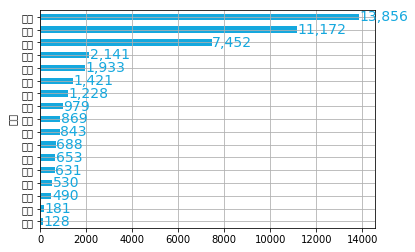

In [27]:
결과df.plot.barh(color="#15A8DE", legend=None)
pyplot.grid()

# 그래프 위에 텍스트 표시
for i, v in enumerate(결과df['누적확진자']):
    # 세자리마다 콤마를 표시하는 형식 지정
    msg = '{n:,}'.format(n=v)
    pyplot.text(v+20, i, msg, fontsize = 14, color = "#15A8DE", horizontalalignment="left", verticalalignment="center")

pyplot.show()

# 지역별 누적 확진자 지도

In [28]:
file = open(r'C:/BA/map_korea.svg')
file

<_io.TextIOWrapper name='C:/BA/map_korea.svg' mode='r' encoding='cp949'>

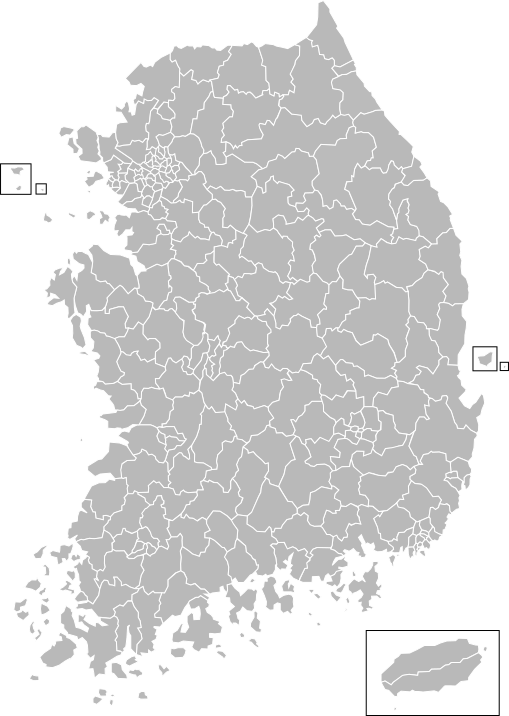

In [29]:
map_svg = None
with open('C:/BA/map_korea.svg', 'r', encoding='utf-8') as f:
    map_svg = f.read()
SVG(map_svg)

In [30]:
colors = ['#F1EEF6', '#D4B9DA', '#C994C7', '#DF65B9', '#DD1C77', '#980043']
colors

['#F1EEF6', '#D4B9DA', '#C994C7', '#DF65B9', '#DD1C77', '#980043']

In [31]:
index_dict = {
    '강원': '강원도',
    '경기': '경기도',
    '경남': '경상남도',
    '경북': '경상북도',
    '광주': '광주광역시',
    '대구': '대구광역시',
    '대전': '대전광역시',
    '부산': '부산광역시',
    '서울': '서울특별시',
    '세종': '세종특별자치시',
    '울산': '울산광역시',
    '인천': '인천광역시',
    '전남': '전라남도',
    '전북': '전라북도',
    '제주': '제주특별자치도',
    '충남': '충청남도',
    '충북': '충청북도'}

최종df = 결과df.rename(index=index_dict)
최종df

,누적확진자
지역,
세종특별자치시,128
제주특별자치도,181
전라남도,490
울산광역시,530
전라북도,631
충청북도,653
대전광역시,688
광주광역시,843
강원도,869


In [32]:
import pandas as pd

dataframe_p=pd.DataFrame(최종df)
dataframe_p.to_csv("corona누적.csv",mode='w',encoding='utf-8-sig')

In [33]:
datap = pd.read_csv('corona누적.csv', encoding='utf-8',engine='python')
datap.head()


,지역
세종특별자치시,128
제주특별자치도,181
전라남도,490
울산광역시,530
전라북도,631


In [34]:
soup = BeautifulSoup(map_svg, "lxml")
glist = soup.select("svg > g[id], svg > path[id]")

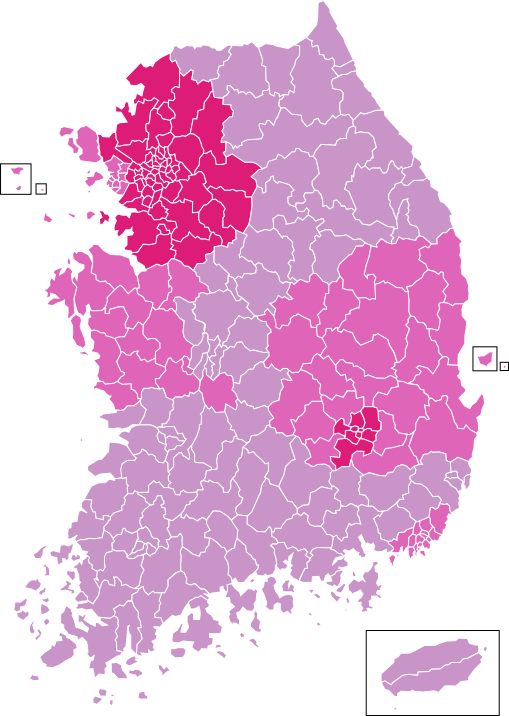

In [35]:
for item in glist:
    # svg 파일에서 추출한 id값이 데이터프레임의 index에 속하지 않았다면 다음으로 넘어감
    if item['id'] not in 최종df.index:
        continue

    # item['id'] --> 지도에서 뽑아낸 id
    # 최종df에서 인덱스 이름이 지도에서 뽑아낸 id와 일치하는 행의 의료기관수를 추출
    count = 최종df.loc[ item['id'], '누적확진자' ]

    # 누적확진자수에 따라 단계값 설정 (단계는 색상값의 수에 따름)
    if count < 30: color_index = 0
    elif count < 100: color_index = 1
    elif count < 1000: color_index = 2
    elif count < 5000: color_index = 3
    else: color_index = 4
        
    #print("%s: 확진자수: %d, 색상인덱스: %d" % (item['id'], count, color_index))

    # item에 fill 속성이 있는 경우 -> 세종특별자치시
    if 'fill' in item.attrs:
        item['fill'] = colors[color_index]
    # 그렇지 않은 경우 -> 나머지 지역
    else:
        # 현재 요소(item)의 하위 항목들에게 색상을 적용해야 한다.
        for p in item.select('g, path'):
            if 'fill' in p.attrs:
                p['fill'] = colors[color_index]

지역별확진자svg = soup.prettify()

SVG(지역별확진자svg)
